In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Datasets/Train'
valid_path = '/content/drive/MyDrive/Datasets/Test'

In [4]:
# ImportING the Vgg 16 library  and adding preprocessing layer to the front of VGG
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87916544/87910968 [==============================] - 0s 0us/step


In [5]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [6]:
# useful for getting number of output classes
folders = glob('/content/drive/MyDrive/Datasets/Train/*')

In [7]:
len(folders)

3

In [8]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [9]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [10]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [11]:
#tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [12]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Datasets/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1242 images belonging to 3 classes.


In [14]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Datasets/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 21 images belonging to 3 classes.


In [15]:
# fitting the model for 20 epochs

r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/20
39/39 [==============================] - 334s 8s/step - loss: 3.6602 - accuracy: 0.7450 - val_loss: 0.5802 - val_accuracy: 0.8095
Epoch 2/20
39/39 [==============================] - 16s 412ms/step - loss: 0.5991 - accuracy: 0.9235 - val_loss: 0.7130 - val_accuracy: 0.7619
Epoch 3/20
39/39 [==============================] - 16s 414ms/step - loss: 0.2670 - accuracy: 0.9561 - val_loss: 3.4996 - val_accuracy: 0.7143
Epoch 4/20
39/39 [==============================] - 16s 411ms/step - loss: 0.6083 - accuracy: 0.9258 - val_loss: 1.0142 - val_accuracy: 0.8095
Epoch 5/20
39/39 [==============================] - 16s 415ms/step - loss: 0.2584 - accuracy: 0.9649 - val_loss: 0.8085 - val_accuracy: 0.9048
Epoch 6/20
39/39 [==============================] - 16s 413ms/step - loss: 0.2204 - accuracy: 0.9606 - val_loss: 1.9939 - val_accuracy: 0.7619
Epoch 7/20
39/39 [==============================] - 16s 416ms/step - loss: 0.6177 - accuracy: 0.9276 - val_loss: 0.5205 - val_accuracy: 0.9524
E

In [16]:
import matplotlib.pyplot as plt

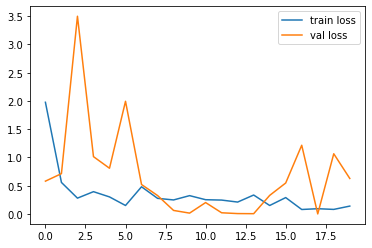

<Figure size 432x288 with 0 Axes>

In [17]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')



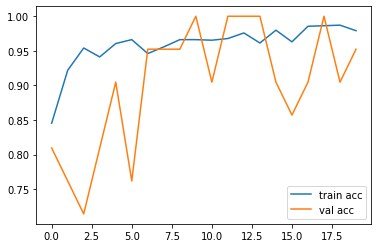

<Figure size 432x288 with 0 Axes>

In [18]:
# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_inception.h5')